In [1]:
import pandas as pd
import seaborn as sns
import glob, os
import numpy as np

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
font_path = mpl.get_data_path() + '/fonts/ttf/cmr10.ttf'
cmfont = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['font.size'] = 16
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df_input = pd.read_csv('result_hwe.csv')

In [3]:
df_input

,Unnamed: 0,n,l,k,ans,num_pars,grad
0,0,4,100,106,hwe,400,-0.307088
1,1,4,200,541,hwe,800,0.005218
2,2,4,100,368,hwe,400,0.516309
3,3,4,100,254,hwe,400,-0.199507
4,4,4,100,254,hwe,400,-0.199507
...,...,...,...,...,...,...,...
7228,7228,8,500,3146,hwe,4000,0.110828
7229,7229,8,500,2300,hwe,4000,-0.220157
7230,7230,8,500,3235,hwe,4000,0.080408
7231,7231,8,500,3029,hwe,4000,0.060535


In [4]:
df = df_input.groupby(['n', 'l']).agg({'grad': ['mean', 'var']})
df.columns = df.columns.to_flat_index()
df.reset_index(inplace=True)

In [5]:
df

,n,l,"(grad, mean)","(grad, var)"
0,4,100,0.043709,0.163888
1,4,200,-0.005817,0.191564
2,4,300,0.004282,0.223314
3,4,400,-0.004243,0.211130
4,4,500,0.027963,0.228524
5,6,100,0.009385,0.082943
6,6,200,0.003758,0.077546
7,6,300,0.003113,0.071163
8,6,400,0.005000,0.077870
9,6,500,0.002189,0.084678


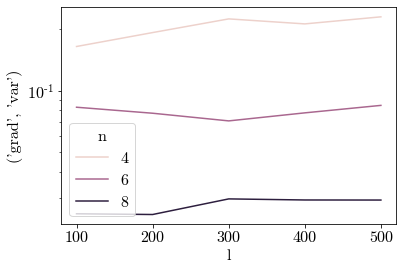

In [6]:
ax = sns.lineplot(
    x='l',
    y=('grad', 'var'),
    hue='n',
    data=df
)
ax.set_yscale('log')

In [12]:
from sklearn.linear_model import LinearRegression

array([[4],
       [6],
       [8]])

In [20]:
reg = LinearRegression().fit(
    X=np.array(df[df['l'] == 500]['n']).reshape(-1, 1),
    y=np.array(df[df['l'] == 500][('grad', 'var')]).reshape(-1, 1)
)
reg.coef_

array([[-0.04980672]])

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


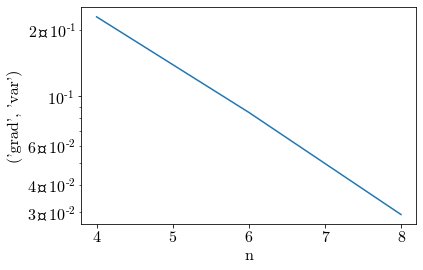

In [8]:
ax = sns.lineplot(
    x='n',
    y=('grad', 'var'),
    data=df[df['l']==500]
)
ax.set_yscale('log')

In [6]:
#ax = sns.lineplot(
#    data=df,
#    hue='n',
#    x='l',
#    y=('grad', 'var')
#)
#ax.set_yscale('log')

In [7]:
df_input_spc_raw = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/spc/output_0.csv"))))
df_input_spc_raw['ans'] = 'spc'
df_input_spc_raw['frac'] = df_input_spc_raw['m'] / df_input_spc_raw['n']
#df_input_spc = df_input_spc_raw[df_input_spc_raw['n']//2 == df_input_spc_raw['m']]
df_input_spc = df_input_spc_raw[df_input_spc_raw['m'] == 1]
df_input_mcp = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/mcp/output_0.csv.old"))))
df_input_mcp['ans'] = 'mcp'
df_input_mcp = df_input_mcp[df_input_mcp['l'] == 2000]

df = pd.concat([df_input_mcp, df_input_spc])

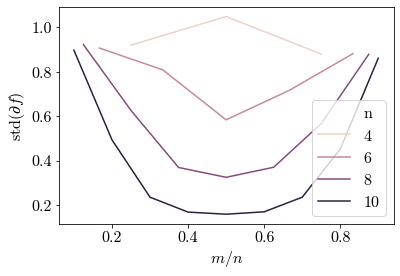

In [8]:
ax = sns.lineplot(
    x='frac',
    y='std',
    hue='n',
    data=df_input_spc_raw
)
ax.set_xlabel(r'$m / n$')
ax.set_ylabel(r'std$(\partial f)$')
ax.legend(loc='lower right')

In [12]:
from math import comb

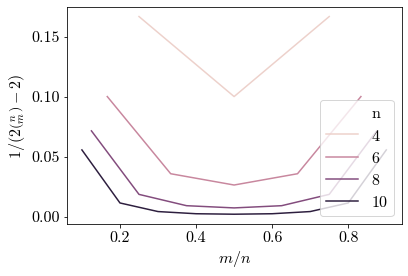

In [18]:
_pars_dat = []
for n in range(4, 11, 2):
    for m in range(1, n):
        pars = 2*(comb(n, m) - 1)
        _pars_dat.append({
            'n': n,
            'm': m,
            'pars': pars,
            '1/pars': 1/pars,
            'frac': m/n
        })

df_pars = pd.DataFrame(_pars_dat)

ax = sns.lineplot(
    x='frac',
    y='1/pars',
    hue='n',
    data=df_pars
)

ax.set_xlabel(r'$m / n$')
ax.set_ylabel(r'$1/(2\binom{n}{m}-2)$')
ax.legend(loc='lower right')

Text(0, 0.5, 'std$(\\partial f)$')

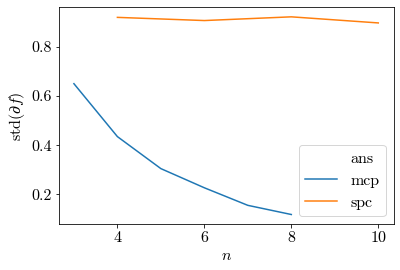

In [57]:
ax = sns.lineplot(
    data=df,
    x='n',
    hue='ans',
    y='std'
)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'std$(\partial f)$')

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


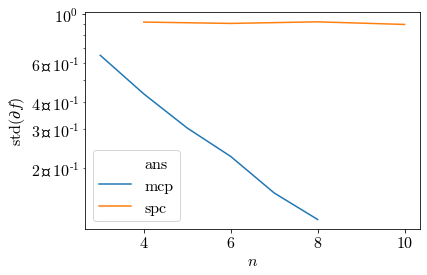

In [59]:
ax = sns.lineplot(
    data=df,
    x='n',
    y='std',
    hue='ans'
)

ax.set_xlabel(r'$n$')
ax.set_ylabel(r'std$(\partial f)$')

ax.set_yscale('log')